In [29]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import time
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [37]:
import numpy as np

In [38]:
%autoreload 2

from bilinear_package.src import hadamard_product, random_tensor, rounding, primitives

In [6]:
def get_tensor_for_experiment(n : int, d : int, r : int, variance : float):
    modes = [d for _ in range(n)]
    ranks = [r for _ in range(n - 1)]
    return random_tensor.createExampleTensor(modes, ranks, variance=variance)

def get_random_tensor_for_experiment(n : int, d : int, r : int):
    modes = [d for _ in range(n)]
    ranks = [r for _ in range(n - 1)]
    return random_tensor.createRandomTensor(modes, ranks)

In [39]:
def default_dict_to_seaborn_plot(results : defaultdict):
    xs = []
    ys = []
    for key, value in results.items():
        xs.extend([key for _ in range(len(value))])
        ys.extend(value)
    return xs, ys

def draw_lineplot(answer, xlabel, ylabel):
    xs, ys = default_dict_to_seaborn_plot(answer)
    fig = plt.figure(figsize=(18, 14))
    plt.xlabel("Размер ранга")
    plt.ylabel("Время, секунды")
    sns.lineplot(xs=xs, ys=ys)

In [7]:
answer = defaultdict(lambda : [])
grid_modes = np.arange(15, 201, 15)
tries = 30

for i in grid_modes:
    tt_tensors1 = []
    tt_tensors2 = []
    for j in range(tries):
        tt_tensors1.append(get_tensor_for_experiment(15, i, 10, 100))
        tt_tensors2.append(get_tensor_for_experiment(15, i, 10, 100))
    
    for j in range(tries):
        time1 = time.time()
        hadamard_product.preciseHadamardProduct(tt_tensors1=tt_tensors1[j], tt_tensors2=tt_tensors2[j])
        time2 = time.time()
        answer[i].append(time2 - time1)

dict(answer)

{15: [0.024666786193847656,
  0.02307605743408203,
  0.046639442443847656,
  0.022836923599243164,
  0.025339841842651367,
  0.01974344253540039,
  0.023823976516723633,
  0.017367839813232422,
  0.016330242156982422,
  0.01575160026550293,
  0.015456914901733398,
  0.016530752182006836,
  0.019801855087280273,
  0.016529321670532227,
  0.015860319137573242,
  0.01589655876159668,
  0.015230417251586914,
  0.01552128791809082,
  0.017115354537963867,
  0.01577591896057129,
  0.01592874526977539,
  0.015393733978271484,
  0.01579761505126953,
  0.015762805938720703,
  0.01551675796508789,
  0.0155029296875,
  0.01587963104248047,
  0.01575016975402832,
  0.015719175338745117,
  0.015598535537719727],
 30: [0.033692359924316406,
  0.04122519493103027,
  0.042508840560913086,
  0.04296684265136719,
  0.043337345123291016,
  0.04861259460449219,
  0.03893685340881348,
  0.038321495056152344,
  0.043819427490234375,
  0.04029035568237305,
  0.035387516021728516,
  0.0344235897064209,
  0.04

/home/divanik/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


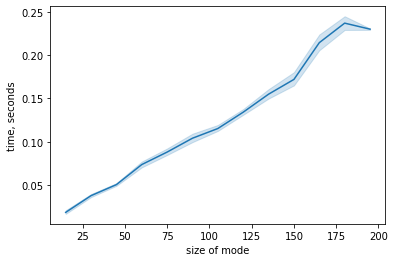

In [14]:
xs, ys = default_dict_to_seaborn_plot(answer)
plt.xlabel("Размер моды")
plt.ylabel("Время, секунды")
sns.lineplot(xs, ys)
plt.show()

In [16]:
answer = defaultdict(lambda : [])
grid_modes = np.arange(5, 38, 3)
tries = 15

for i in grid_modes:
    tt_tensors1 = []
    tt_tensors2 = []
    for j in range(tries):
        tt_tensors1.append(get_tensor_for_experiment(15, 25, i, 100))
        tt_tensors2.append(get_tensor_for_experiment(15, 25, i, 100))
    
    for j in range(tries):
        time1 = time.time()
        hadamard_product.preciseHadamardProduct(tt_tensors1=tt_tensors1[j], tt_tensors2=tt_tensors2[j])
        time2 = time.time()
        answer[i].append(time2 - time1)

dict(answer)

{5: [0.01272726058959961,
  0.011617660522460938,
  0.010524272918701172,
  0.010459184646606445,
  0.009618043899536133,
  0.010231494903564453,
  0.009079456329345703,
  0.009431600570678711,
  0.009075641632080078,
  0.008915185928344727,
  0.009334087371826172,
  0.00980830192565918,
  0.010628461837768555,
  0.010098934173583984,
  0.010242223739624023],
 8: [0.015616178512573242,
  0.015337944030761719,
  0.015069246292114258,
  0.015503883361816406,
  0.0149383544921875,
  0.014871597290039062,
  0.015222549438476562,
  0.015399932861328125,
  0.014965057373046875,
  0.014848947525024414,
  0.01513981819152832,
  0.015165567398071289,
  0.01494145393371582,
  0.013955116271972656,
  0.01359868049621582],
 11: [0.025114059448242188,
  0.026817798614501953,
  0.02462458610534668,
  0.025944232940673828,
  0.024829387664794922,
  0.025158166885375977,
  0.02476787567138672,
  0.025286197662353516,
  0.02475571632385254,
  0.025354862213134766,
  0.024686098098754883,
  0.0254323482

/home/divanik/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


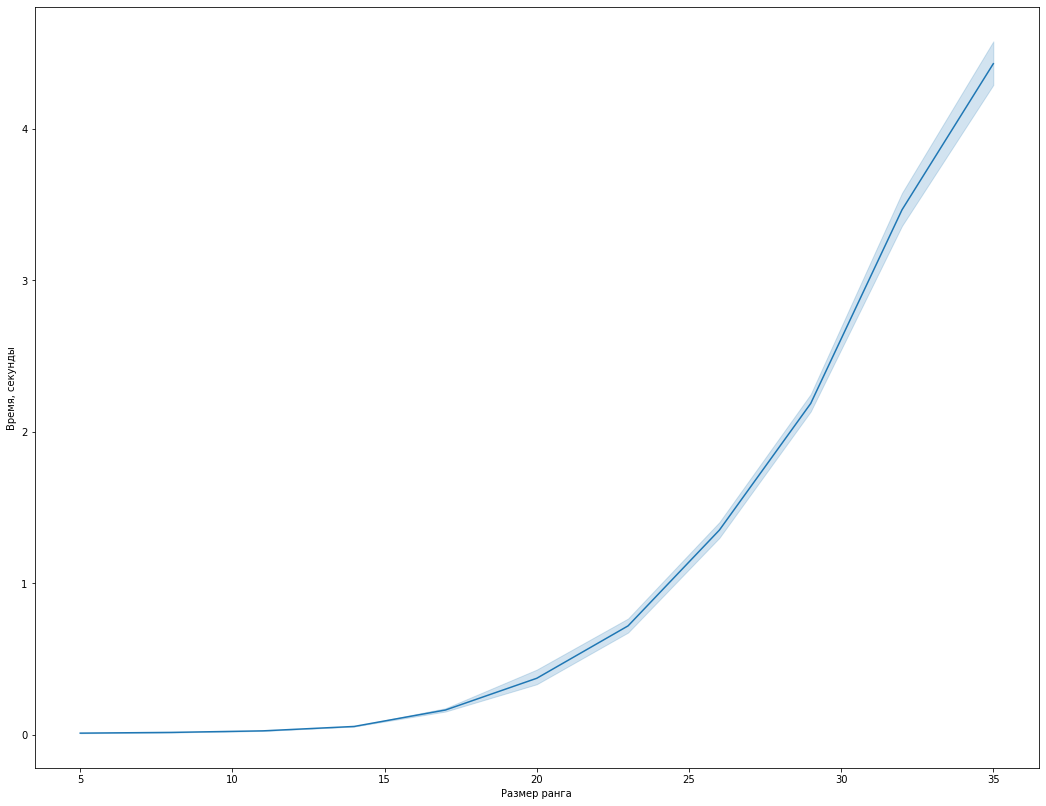

In [23]:
draw_lineplot(answer, "Размер ранга", "Время, секунды")

{10: [0.07653355598449707, 0.06499743461608887], 20: [0.14149069786071777, 0.1580348014831543], 30: [0.2732064723968506, 0.2751181125640869], 40: [0.4158761501312256, 0.440030574798584], 50: [0.5325863361358643, 0.6863296031951904], 60: [1.180368185043335, 1.6756486892700195], 70: [2.130835771560669, 2.0758230686187744], 80: [2.547234535217285, 2.4104695320129395], 90: [2.71467661857605, 2.704244375228882], 100: [3.3020174503326416, 3.73354172706604]}


/home/divanik/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

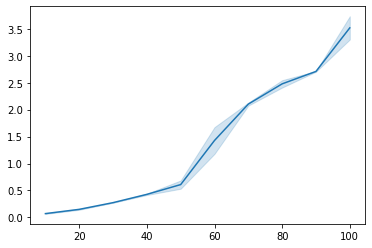

In [41]:
answer = defaultdict(lambda : [])
answer2 = defaultdict(lambda : [])
answer3 = defaultdict(lambda : [])
grid_modes = np.arange(5, 101, 5)
tries = 1

for i in grid_modes:
    tt_tensors1 = []
    tt_tensors2 = []
    tt_tensors_random = []
    for _ in range(tries):
        tt_tensors1.append(get_tensor_for_experiment(5, 12, 10, 1))
        tt_tensors2.append(get_tensor_for_experiment(5, 12, 10, 1))
        tt_tensors_random.append(get_random_tensor_for_experiment(5, 12, i))
    
    for j in range(tries):
        time1 = time.time()
        hadamard_product.approximateHadamardProduct(tt_tensors1=tt_tensors1[j], tt_tensors2=tt_tensors2[j], random_tensor=tt_tensors_random[j])
        time2 = time.time()
        precise_hadamard = hadamard_product.preciseHadamardProduct(tt_tensors1=tt_tensors1[j], tt_tensors2=tt_tensors2[j])
        rounded_tensor = rounding.randomizeThenOrthogonalize(precise_hadamard, tt_tensors_random[j])
        time3 = time.time()
        answer[i].append(time2 - time1)
        answer2[i].append(time3 - time2)
        answer3[i].append(primitives.ttTensorsRelativeComparance(precise_hadamard, rounded_tensor))

print(dict(answer))
print(dict(answer2))
print(dict(answer3))

{5: [0.006661415100097656], 10: [0.0058133602142333984], 15: [0.007066965103149414], 20: [0.008693933486938477], 25: [0.011450529098510742], 30: [0.017983675003051758], 35: [0.023659229278564453], 40: [0.028883934020996094], 45: [0.034773826599121094], 50: [0.04459357261657715], 55: [0.05165576934814453], 60: [0.07039475440979004], 65: [0.091796875], 70: [0.1067342758178711], 75: [0.11461973190307617], 80: [0.15642881393432617], 85: [0.16275334358215332], 90: [0.17777109146118164], 95: [0.24183940887451172], 100: [0.24558377265930176]}
{5: [0.07223129272460938], 10: [0.2020730972290039], 15: [0.4278535842895508], 20: [0.6892528533935547], 25: [1.065157413482666], 30: [1.537062406539917], 35: [2.2714929580688477], 40: [2.9433560371398926], 45: [3.6510066986083984], 50: [4.618723154067993], 55: [5.698941946029663], 60: [7.414459705352783], 65: [8.852097988128662], 70: [10.27236533164978], 75: [11.826981544494629], 80: [14.371622562408447], 85: [16.101245164871216], 90: [19.06237316131591

/home/divanik/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/divanik/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


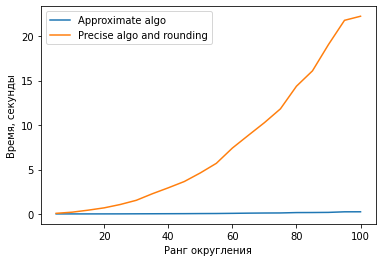

/home/divanik/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/divanik/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


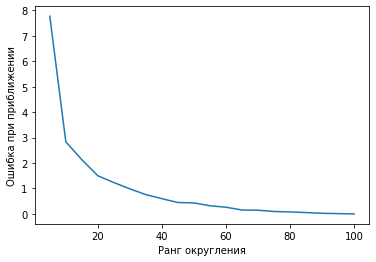

In [42]:
xs1, ys1 = default_dict_to_seaborn_plot(answer)
xs2, ys2 = default_dict_to_seaborn_plot(answer2)
xs3, ys3 = default_dict_to_seaborn_plot(answer3)

plt.xlabel("Ранг округления")
plt.ylabel("Время, секунды")
sns.lineplot(xs1, ys1, label="Approximate algo")
sns.lineplot(xs2, ys2, label="Precise algo and rounding")
plt.show()

plt.xlabel("Ранг округления")
plt.ylabel("Ошибка при приближении")
sns.lineplot(xs3, ys3)
plt.show()